In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import nltk

In [2]:
train_df = pd.read_csv('train.csv',names=['index', 'title', 'description'])
test_df = pd.read_csv('test.csv', names=['index', 'title', 'description'])

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   index        120000 non-null  int64 
 1   title        120000 non-null  object
 2   description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        7600 non-null   int64 
 1   title        7600 non-null   object
 2   description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [5]:
train_df.describe(include='all')

,index,title,description
count,120000.000000,120000,120000
unique,NaN,114364,118731
top,NaN,Transactions,"With the economy slowly turning up, upgrading ..."
freq,NaN,39,15
mean,2.500000,NaN,NaN
std,1.118039,NaN,NaN
min,1.000000,NaN,NaN
25%,1.750000,NaN,NaN
50%,2.500000,NaN,NaN
75%,3.250000,NaN,NaN


In [6]:
test_df.describe(include='all')

,index,title,description
count,7600.000000,7600,7600
unique,NaN,7569,7594
top,NaN,Today's schedule,WASHINGTON (Reuters) - The U.S. economy slowe...
freq,NaN,4,2
mean,2.500000,NaN,NaN
std,1.118108,NaN,NaN
min,1.000000,NaN,NaN
25%,1.750000,NaN,NaN
50%,2.500000,NaN,NaN
75%,3.250000,NaN,NaN


In [7]:
train_df.head()

,index,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [8]:
# Count missing values
print(train_df.isna().sum())
# Count missing values
print(test_df.isna().sum())

index          0
title          0
description    0
dtype: int64
index          0
title          0
description    0
dtype: int64


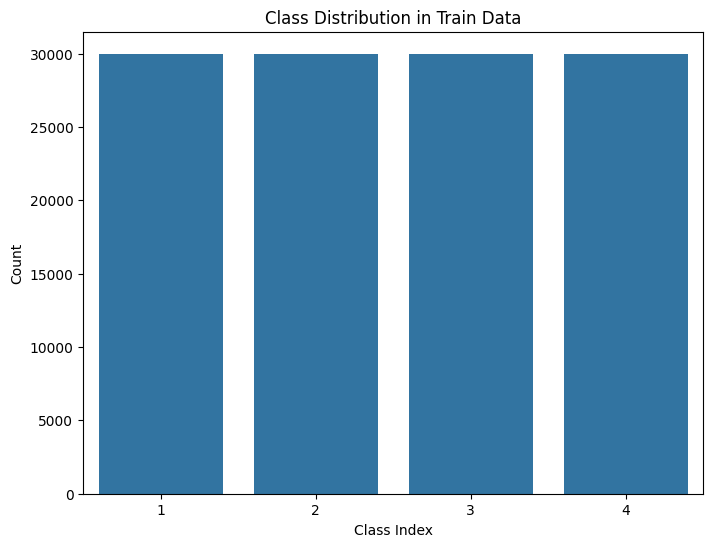

In [9]:
# Visualization 1 - Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='index', data=train_df)
plt.title('Class Distribution in Train Data')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

In [10]:
from wordcloud import WordCloud

# Word frequency analysis
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=1200, height=1200, background_color='white', stopwords=set()).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

all_titles = ' '.join(train_df['title'].values)
all_descriptions = ' '.join(train_df['description'].values)


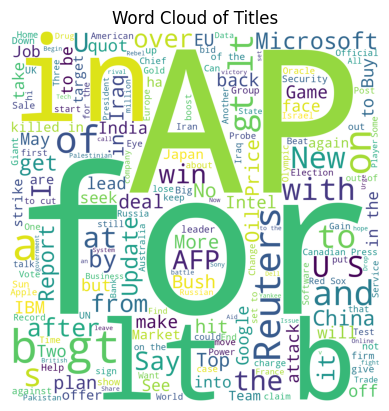

In [11]:
#Visualization 2
plot_wordcloud(all_titles, "Word Cloud of Titles")

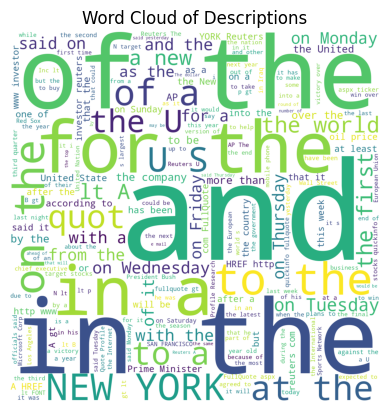

In [12]:
#Visualization 3
plot_wordcloud(all_descriptions, "Word Cloud of Descriptions")

In [13]:
import numpy as np

# Text length analysis
train_df['title_length'] = train_df['title'].apply(len)
train_df['description_length'] = train_df['description'].apply(len)

# Calculate mean lengths
title_mean = np.mean(train_df['title_length'])
desc_mean = np.mean(train_df['description_length'])

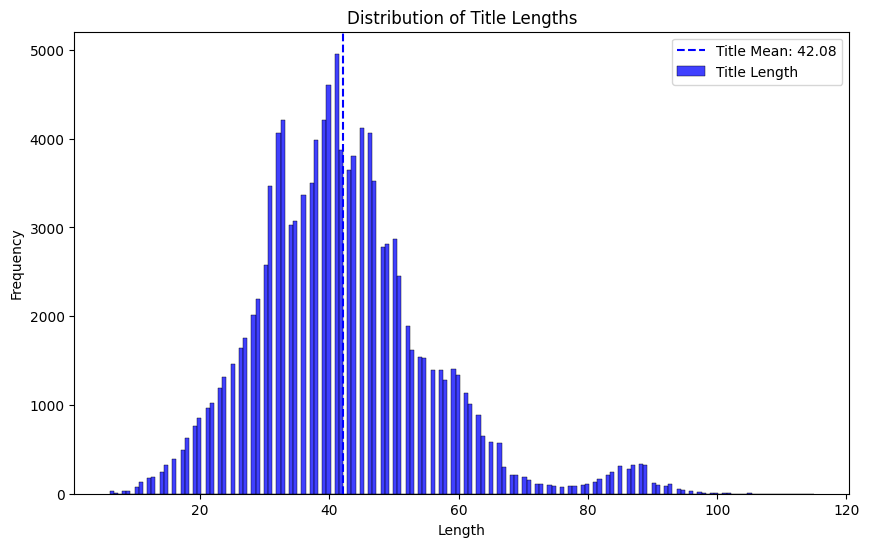

In [14]:
# Visualization 4 - Plot histogram for title lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['title_length'], label='Title Length', color='blue')
plt.axvline(title_mean, color='blue', linestyle='--', label=f"Title Mean: {title_mean:.2f}")
plt.legend()
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

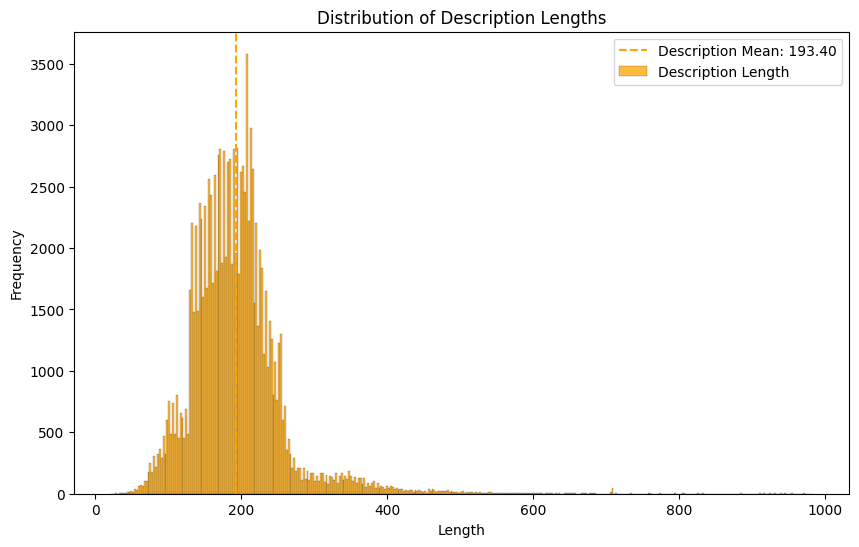

In [15]:
# Visualization 5 - Plot histogram for description lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['description_length'], label='Description Length', color='orange')
plt.axvline(desc_mean, color='orange', linestyle='--', label=f"Description Mean: {desc_mean:.2f}")
plt.legend()
plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [16]:
import torch
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
word_embeddings = torchtext.vocab.GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.37MB/s]                           
100%|█████████▉| 399999/400000 [00:20<00:00, 19703.51it/s]


In [18]:
# Preprocess function, Tokenizing
def preprocess_text(text):
    tokenizer = get_tokenizer("basic_english")
    tokens = tokenizer(text.lower())
    indices = [word_embeddings.stoi.get(token, 0) for token in tokens if token not in stop_words and token not in string.punctuation]
    return indices

# Adjusting labels to start from 0
train_df['index'] -= 1
test_df['index'] -= 1


# Preprocess the data
train_df['title_embeddings'] = train_df['title'].apply(preprocess_text)
test_df['title_embeddings'] = test_df['title'].apply(preprocess_text)

# Extract features and labels
X_train = list(train_df['title_embeddings'])
y_train = train_df['index'].values

X_test = list(test_df['title_embeddings'])
y_test = test_df['index'].values

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Split original test data into validation and test sets
X_val_final, X_test_final, y_val_final, y_test_final = train_test_split(X_test, y_test_encoded, test_size=0.5, random_state=42)

# Rename variables
X_val = X_val_final
y_val = y_val_final
X_test = X_test_final
y_test = y_test_final

In [19]:
# Padding function
def pad_sequences(sequences, max_len):
    padded_sequences = np.zeros((len(sequences), max_len))
    for i, seq in enumerate(sequences):
        seq_len = min(len(seq), max_len)
        padded_sequences[i, :seq_len] = seq[:seq_len]
    return padded_sequences

# Find max length for padding
max_len = max(max(len(s) for s in X_train), max(len(s) for s in X_val), max(len(s) for s in X_test))

# Pad sequences
X_train_padded = pad_sequences(X_train, max_len)
X_val_padded = pad_sequences(X_val, max_len)
X_test_padded = pad_sequences(X_test, max_len)

# Convert to tensor and create datasets and loaders
train_dataset = TensorDataset(torch.tensor(X_train_padded, dtype=torch.long), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val_padded, dtype=torch.long), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test_padded, dtype=torch.long), torch.tensor(y_test, dtype=torch.long))


In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)
print("Train DataLoader:")
print("Number of batches:", len(train_loader))
print("Batch size:", train_loader.batch_size)
print("Total samples:", len(train_loader.dataset))
print()

print("Validation DataLoader:")
print("Number of batches:", len(val_loader))
print("Batch size:", val_loader.batch_size)
print("Total samples:", len(val_loader.dataset))
print()

print("Test DataLoader:")
print("Number of batches:", len(test_loader))
print("Batch size:", test_loader.batch_size)
print("Total samples:", len(test_loader.dataset))
print()

Train DataLoader:
Number of batches: 3750
Batch size: 32
Total samples: 120000

Validation DataLoader:
Number of batches: 119
Batch size: 32
Total samples: 3800

Test DataLoader:
Number of batches: 119
Batch size: 32
Total samples: 3800



## 1 - Base model

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len):
        super(TransformerClassifier, self).__init__()
        self.embed_dim = embed_dim

        # Embedding layer - using pre-trained GloVe embeddings
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.embedding.weight = nn.Parameter(word_embeddings.vectors)  # Assume 'word_embeddings' is your GloVe loaded embedding matrix

        # Positional Encoding - Note: Now it just initializes, not creating the actual encoding
        self.max_len = max_len
        self.embed_dim = embed_dim

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=n_heads, dim_feedforward=ff_dim)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Output layer
        self.output_layer = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        # Create positional encoding dynamically based on the sequence length of each batch
        seq_length = embedded.size(1)
        positional_encoded = self.create_positional_encoding(seq_length, self.embed_dim, x.device)
        x = embedded + positional_encoded
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.transpose(0, 1).mean(dim=1)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=-1)

    def create_positional_encoding(self, seq_length, embed_size, device):
        position = torch.arange(0, seq_length, dtype=torch.float, device=device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size)).to(device)
        positional_encoding = torch.zeros(seq_length, embed_size, device=device)
        positional_encoding[:, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 1::2] = torch.cos(position * div_term)
        return positional_encoding.unsqueeze(0)


# Parameters
input_dim = len(word_embeddings.itos)  # Size of vocabulary
embed_dim = 100  # Dimension of GloVe embeddings
n_heads = 2  # Number of attention heads
ff_dim = 2048  # Dimension of feedforward network
num_layers = 2  # Number of transformer layers
num_classes = 4  # Number of classes
max_len = max_len  # Maximum sequence length


In [61]:
# Model instantiation
model = TransformerClassifier(input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len)
print(model)

import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device (GPU if available)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization via weight_decay
criterion = nn.CrossEntropyLoss()


TransformerClassifier(
  (embedding): Embedding(400000, 100)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_features=100, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=100, bias=True)
        (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=100, out_features=4, bias=True)
)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [23]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, l1_lambda=1e-5, patience=3):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    # Lists to store metrics
    epoch_train_losses = []
    epoch_train_accuracies = []
    epoch_val_losses = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # L1 regularization
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_norm

            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct_predictions / total_predictions
        epoch_train_losses.append(train_loss)
        epoch_train_accuracies.append(train_accuracy)

        # Validation
        val_loss = 0.0
        correct_val_predictions = 0
        total_val_predictions = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs.data, 1)
                correct_val_predictions += (predicted == labels).sum().item()
                total_val_predictions += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val_predictions / total_val_predictions
        epoch_val_losses.append(val_loss)
        epoch_val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping')
                early_stop = True
                break

    if early_stop:
        print("Stopped early. Loading best model weights.")
        model.load_state_dict(best_model_wts)

    # Return the model and the metrics for plotting
    return model, epoch_train_losses, epoch_train_accuracies, epoch_val_losses, epoch_val_accuracies

trained_model, train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch 1, Train Loss: 12.1519, Train Accuracy: 0.8305, Val Loss: 0.4537, Val Accuracy: 0.8376
Epoch 2, Train Loss: 0.7512, Train Accuracy: 0.8587, Val Loss: 0.4188, Val Accuracy: 0.8539
Epoch 3, Train Loss: 0.6338, Train Accuracy: 0.8690, Val Loss: 0.4334, Val Accuracy: 0.8524
Epoch 4, Train Loss: 0.5709, Train Accuracy: 0.8773, Val Loss: 0.3926, Val Accuracy: 0.8653
Epoch 5, Train Loss: 0.5283, Train Accuracy: 0.8841, Val Loss: 0.4044, Val Accuracy: 0.8624
Epoch 6, Train Loss: 0.5036, Train Accuracy: 0.8865, Val Loss: 0.3934, Val Accuracy: 0.8639
Epoch 7, Train Loss: 0.4855, Train Accuracy: 0.8892, Val Loss: 0.3811, Val Accuracy: 0.8676
Epoch 8, Train Loss: 0.4698, Train Accuracy: 0.8924, Val Loss: 0.4084, Val Accuracy: 0.8637
Epoch 9, Train Loss: 0.4550, Train Accuracy: 0.8953, Val Loss: 0.3874, Val Accuracy: 0.8668
Epoch 10, Train Loss: 0.4416, Train Accuracy: 0.8976, Val Loss: 0.3842, Val Accuracy: 0.8708
Early stopping
Stopped early. Loading best model weights.


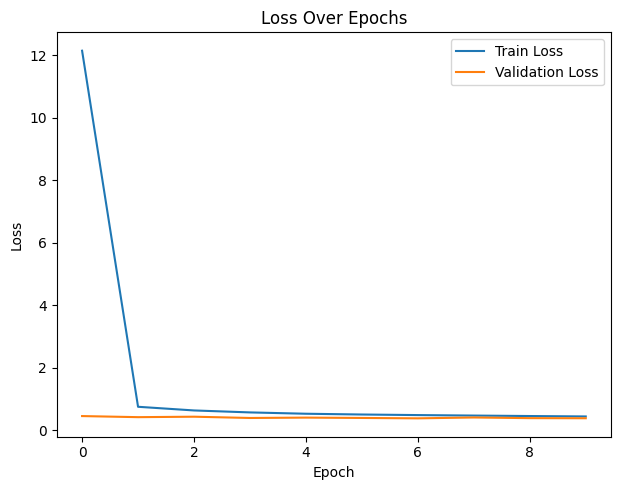

In [24]:
# Plot training and validation losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


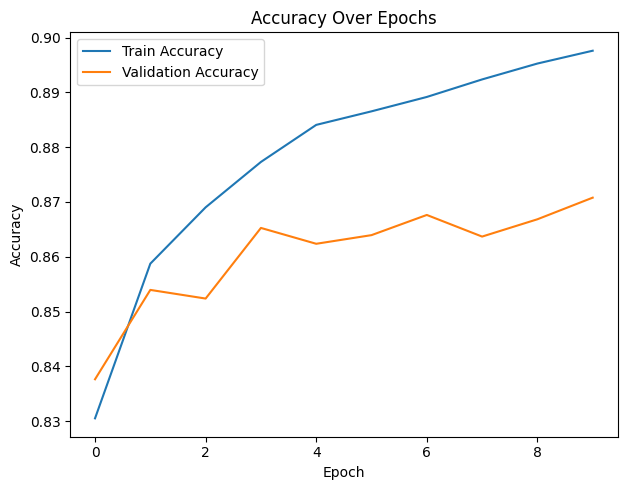

In [25]:
# Plot training and validation accuracies
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
def evaluate_model(model, test_loader, criterion):
    with torch.no_grad():  # No need to track gradients for evaluation
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.to(device)
        model.eval()  # Set model to evaluation mode
        test_loss, correct, total = 0.0, 0, 0

        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_test_loss = test_loss / len(test_loader.dataset)
        test_accuracy = correct / total

    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model on the test dataset
evaluate_model(model, test_loader, criterion)


Test Loss: 0.3735, Test Accuracy: 0.8721


In [29]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np

model.eval()  # Set the model to evaluation mode
true_labels = []
predictions = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays for sklearn compatibility
true_labels = np.array(true_labels)
predictions = np.array(predictions)


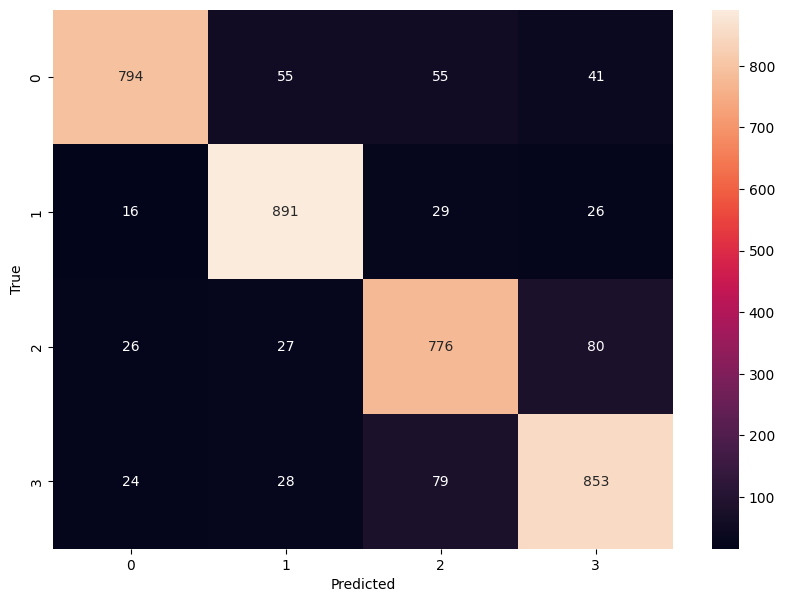

In [30]:
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Precision: 0.8732, Recall: 0.8717, F1 Score: 0.8718


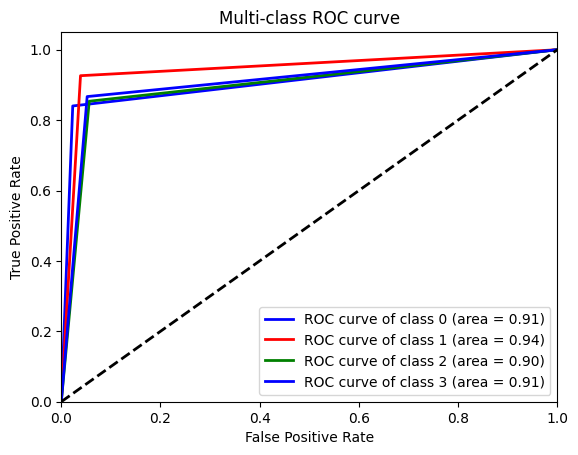

In [32]:
# Binarize the output labels for multi-class ROC curve
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predictions_bin = label_binarize(predictions, classes=np.unique(true_labels))

# Compute ROC curve and ROC area for each class
n_classes = true_labels_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()


##2 - Base model + Dropout layer

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math
from torch.utils.data import DataLoader
from copy import deepcopy

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.embedding.weight = nn.Parameter(word_embeddings.vectors)
        self.max_len = max_len
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=n_heads, dim_feedforward=ff_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        seq_length = embedded.size(1)
        positional_encoded = self.create_positional_encoding(seq_length, self.embed_dim, x.device)
        x = embedded + positional_encoded
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.transpose(0, 1).mean(dim=1)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=-1)

    def create_positional_encoding(self, seq_length, embed_size, device):
        position = torch.arange(0, seq_length, dtype=torch.float, device=device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size)).to(device)
        positional_encoding = torch.zeros(seq_length, embed_size, device=device)
        positional_encoding[:, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 1::2] = torch.cos(position * div_term)
        return positional_encoding.unsqueeze(0)

# Parameters
input_dim = len(word_embeddings.itos)  # Size of vocabulary
embed_dim = 100  # Dimension of GloVe embeddings
n_heads = 2  # Number of attention heads
ff_dim = 2048  # Dimension of feedforward network
num_layers = 2  # Number of transformer layers
num_classes = 4  # Number of classes
max_len = max_len  # Maximum sequence length
dropout = 0.1  # Dropout rate

# Model instantiation
model = TransformerClassifier(input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout)
print(model)

TransformerClassifier(
  (embedding): Embedding(400000, 100)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_features=100, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=100, bias=True)
        (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=100, out_features=4, bias=True)
)


In [63]:
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device (GPU if available)
model = model.to(device)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [35]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, l1_lambda=1e-5, patience=3):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    # Lists to store metrics
    epoch_train_losses = []
    epoch_train_accuracies = []
    epoch_val_losses = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct_predictions / total_predictions
        epoch_train_losses.append(train_loss)
        epoch_train_accuracies.append(train_accuracy)

        # Validation
        val_loss = 0.0
        correct_val_predictions = 0
        total_val_predictions = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs.data, 1)
                correct_val_predictions += (predicted == labels).sum().item()
                total_val_predictions += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val_predictions / total_val_predictions
        epoch_val_losses.append(val_loss)
        epoch_val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping')
                early_stop = True
                break

    if early_stop:
        print("Stopped early. Loading best model weights.")
        model.load_state_dict(best_model_wts)

    # Return the model and the metrics for plotting
    return model, epoch_train_losses, epoch_train_accuracies, epoch_val_losses, epoch_val_accuracies

trained_model, train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch 1, Train Loss: 0.4246, Train Accuracy: 0.8514, Val Loss: 0.3772, Val Accuracy: 0.8689
Epoch 2, Train Loss: 0.3134, Train Accuracy: 0.8933, Val Loss: 0.3608, Val Accuracy: 0.8737
Epoch 3, Train Loss: 0.2641, Train Accuracy: 0.9101, Val Loss: 0.3745, Val Accuracy: 0.8771
Epoch 4, Train Loss: 0.2292, Train Accuracy: 0.9223, Val Loss: 0.4160, Val Accuracy: 0.8800
Epoch 5, Train Loss: 0.2042, Train Accuracy: 0.9302, Val Loss: 0.4117, Val Accuracy: 0.8789
Epoch 6, Train Loss: 0.1839, Train Accuracy: 0.9363, Val Loss: 0.3984, Val Accuracy: 0.8753
Epoch 7, Train Loss: 0.1668, Train Accuracy: 0.9424, Val Loss: 0.4608, Val Accuracy: 0.8761
Epoch 8, Train Loss: 0.1534, Train Accuracy: 0.9461, Val Loss: 0.5475, Val Accuracy: 0.8658
Epoch 9, Train Loss: 0.1422, Train Accuracy: 0.9500, Val Loss: 0.4772, Val Accuracy: 0.8700
Epoch 10, Train Loss: 0.1316, Train Accuracy: 0.9531, Val Loss: 0.5515, Val Accuracy: 0.8679


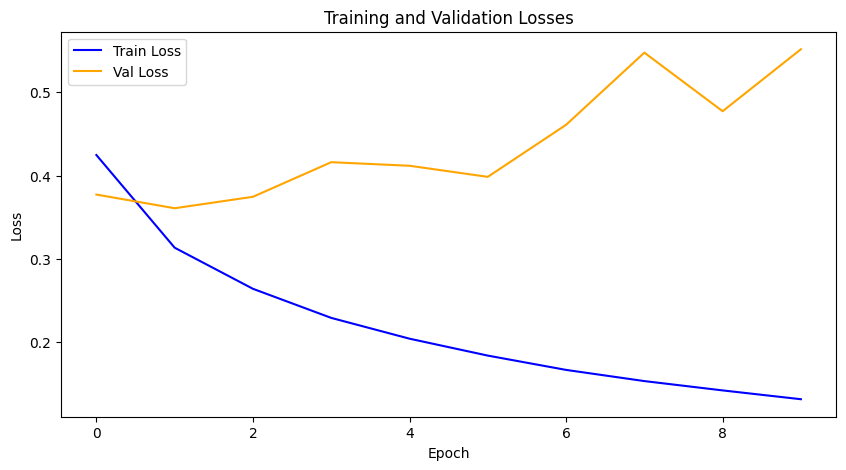

In [36]:
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Val Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()



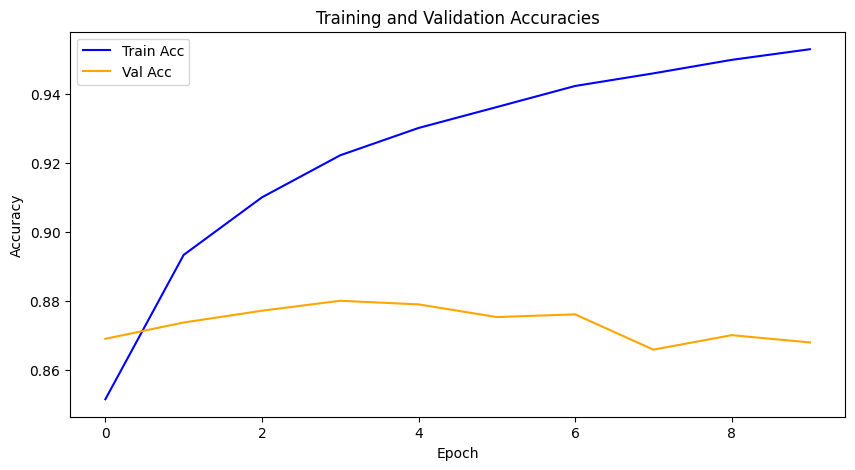

In [37]:
# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Acc', color='blue')
plt.plot(val_accuracies, label='Val Acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

In [38]:
def evaluate_model(model, test_loader, criterion):
    with torch.no_grad():  # No need to track gradients for evaluation
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.to(device)
        model.eval()  # Set model to evaluation mode
        test_loss, correct, total = 0.0, 0, 0

        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_test_loss = test_loss / len(test_loader.dataset)
        test_accuracy = correct / total

    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model on the test dataset
evaluate_model(model, test_loader, criterion)


Test Loss: 0.5598, Test Accuracy: 0.8676


In [39]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np

model.eval()  # Set the model to evaluation mode
true_labels = []
predictions = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays for sklearn compatibility
true_labels = np.array(true_labels)
predictions = np.array(predictions)


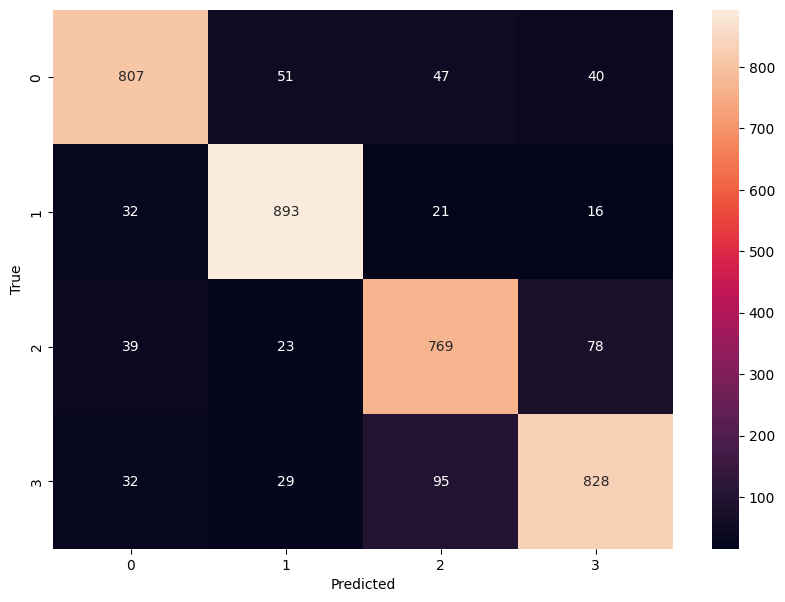

In [40]:
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Precision: 0.8673, Recall: 0.8674, F1 Score: 0.8672


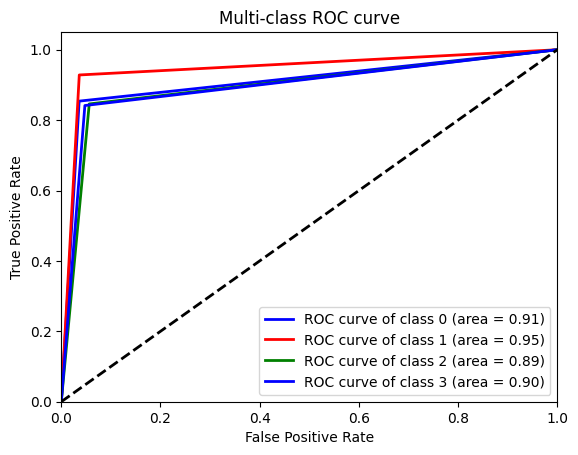

In [42]:
# Binarize the output labels for multi-class ROC curve
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predictions_bin = label_binarize(predictions, classes=np.unique(true_labels))

# Compute ROC curve and ROC area for each class
n_classes = true_labels_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()


## 3 - Best model with L2, Dropout, Early stopping

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math
from torch.utils.data import DataLoader
from copy import deepcopy

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.embedding.weight = nn.Parameter(word_embeddings.vectors)
        self.max_len = max_len
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=n_heads, dim_feedforward=ff_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        seq_length = embedded.size(1)
        positional_encoded = self.create_positional_encoding(seq_length, self.embed_dim, x.device)
        x = embedded + positional_encoded
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.transpose(0, 1).mean(dim=1)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=-1)

    def create_positional_encoding(self, seq_length, embed_size, device):
        position = torch.arange(0, seq_length, dtype=torch.float, device=device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size)).to(device)
        positional_encoding = torch.zeros(seq_length, embed_size, device=device)
        positional_encoding[:, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 1::2] = torch.cos(position * div_term)
        return positional_encoding.unsqueeze(0)

# Parameters
input_dim = len(word_embeddings.itos)  # Size of vocabulary
embed_dim = 100  # Dimension of GloVe embeddings
n_heads = 2  # Number of attention heads
ff_dim = 2048  # Dimension of feedforward network
num_layers = 2  # Number of transformer layers
num_classes = 4  # Number of classes
max_len = max_len  # Maximum sequence length, already calculated in your code
dropout = 0.1  # Dropout rate

# Model instantiation
model = TransformerClassifier(input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout)
print(model)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization via weight_decay
criterion = nn.CrossEntropyLoss()


TransformerClassifier(
  (embedding): Embedding(400000, 100)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_features=100, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=100, bias=True)
        (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=100, out_features=4, bias=True)
)


In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math
from torch.utils.data import DataLoader
from copy import deepcopy

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.embedding.weight = nn.Parameter(word_embeddings.vectors)
        self.max_len = max_len
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=n_heads, dim_feedforward=ff_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        seq_length = embedded.size(1)
        positional_encoded = self.create_positional_encoding(seq_length, self.embed_dim, x.device)
        x = embedded + positional_encoded
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.transpose(0, 1).mean(dim=1)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=-1)

    def create_positional_encoding(self, seq_length, embed_size, device):
        position = torch.arange(0, seq_length, dtype=torch.float, device=device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size)).to(device)
        positional_encoding = torch.zeros(seq_length, embed_size, device=device)
        positional_encoding[:, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 1::2] = torch.cos(position * div_term)
        return positional_encoding.unsqueeze(0)

# Parameters
input_dim = len(word_embeddings.itos)  # Size of vocabulary
embed_dim = 100  # Dimension of GloVe embeddings
n_heads = 2  # Number of attention heads
ff_dim = 2048  # Dimension of feedforward network
num_layers = 2  # Number of transformer layers
num_classes = 4  # Number of classes
max_len = max_len  # Maximum sequence length, already calculated in your code
dropout = 0.1  # Dropout rate

# Model instantiation
model = TransformerClassifier(input_dim, embed_dim, n_heads, ff_dim, num_layers, num_classes, max_len, dropout)
print(model)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization via weight_decay
criterion = nn.CrossEntropyLoss()

TransformerClassifier(
  (embedding): Embedding(400000, 100)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_features=100, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=100, bias=True)
        (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=100, out_features=4, bias=True)
)


In [67]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, l1_lambda=1e-5, patience=3):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    # Lists to store metrics
    epoch_train_losses = []
    epoch_train_accuracies = []
    epoch_val_losses = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # L1 regularization
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_norm

            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct_predictions / total_predictions
        epoch_train_losses.append(train_loss)
        epoch_train_accuracies.append(train_accuracy)

        # Validation
        val_loss = 0.0
        correct_val_predictions = 0
        total_val_predictions = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs.data, 1)
                correct_val_predictions += (predicted == labels).sum().item()
                total_val_predictions += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val_predictions / total_val_predictions
        epoch_val_losses.append(val_loss)
        epoch_val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping')
                early_stop = True
                break

    if early_stop:
        print("Stopped early. Loading best model weights.")
        model.load_state_dict(best_model_wts)

    # Return the model and the metrics for plotting
    return model, epoch_train_losses, epoch_train_accuracies, epoch_val_losses, epoch_val_accuracies

trained_model, train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch 1, Train Loss: 0.4214, Train Accuracy: 0.8531, Val Loss: 0.3783, Val Accuracy: 0.8716
Epoch 2, Train Loss: 0.3116, Train Accuracy: 0.8947, Val Loss: 0.3467, Val Accuracy: 0.8766
Epoch 3, Train Loss: 0.2623, Train Accuracy: 0.9106, Val Loss: 0.4484, Val Accuracy: 0.8621
Epoch 4, Train Loss: 0.2260, Train Accuracy: 0.9227, Val Loss: 0.3960, Val Accuracy: 0.8800
Epoch 5, Train Loss: 0.2005, Train Accuracy: 0.9315, Val Loss: 0.3947, Val Accuracy: 0.8750
Early stopping
Stopped early. Loading best model weights.


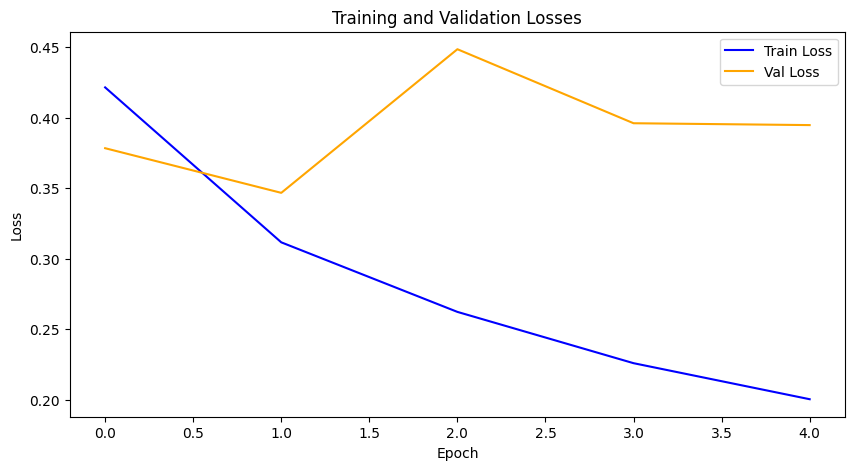

In [68]:
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Val Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()



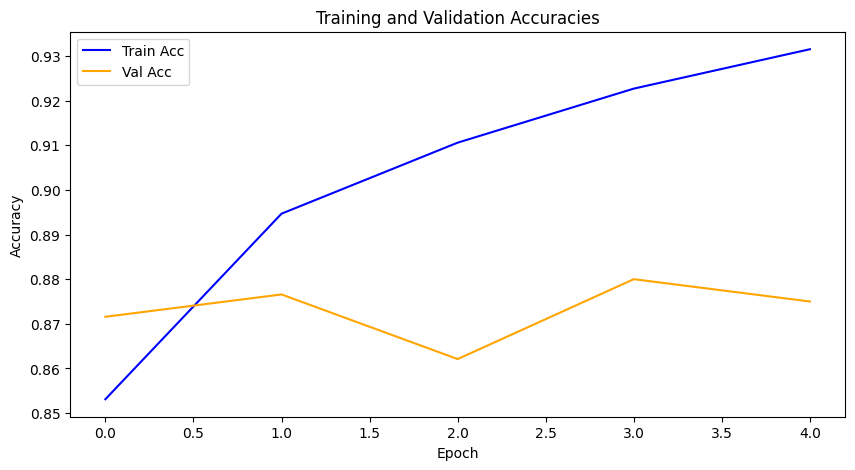

In [69]:
# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Acc', color='blue')
plt.plot(val_accuracies, label='Val Acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

In [70]:
def evaluate_model(model, test_loader, criterion):
    with torch.no_grad():  # No need to track gradients for evaluation
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.to(device)
        model.eval()  # Set model to evaluation mode
        test_loss, correct, total = 0.0, 0, 0

        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_test_loss = test_loss / len(test_loader.dataset)
        test_accuracy = correct / total

    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model on the test dataset
evaluate_model(model, test_loader, criterion)


Test Loss: 0.3419, Test Accuracy: 0.8829


In [71]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np

model.eval()  # Set the model to evaluation mode
true_labels = []
predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays for sklearn compatibility
true_labels = np.array(true_labels)
predictions = np.array(predictions)


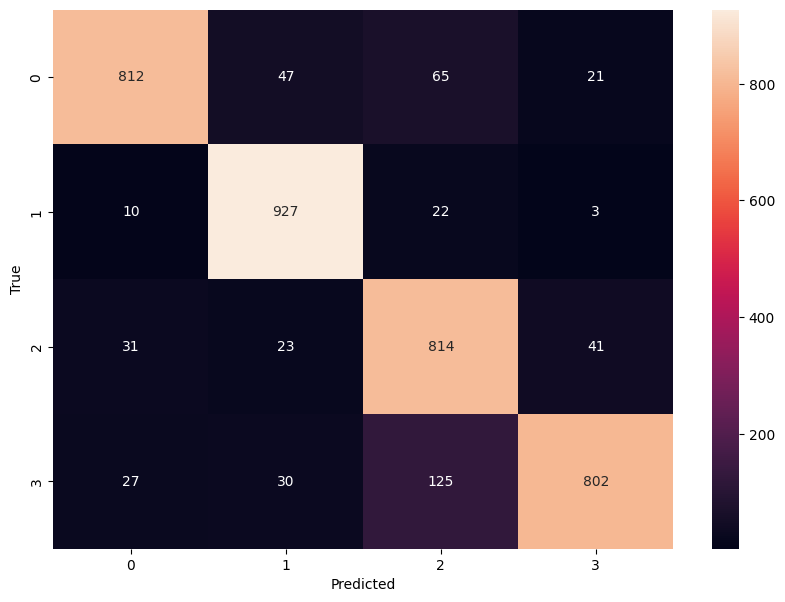

In [72]:
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [73]:
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Precision: 0.8859, Recall: 0.8834, F1 Score: 0.8825


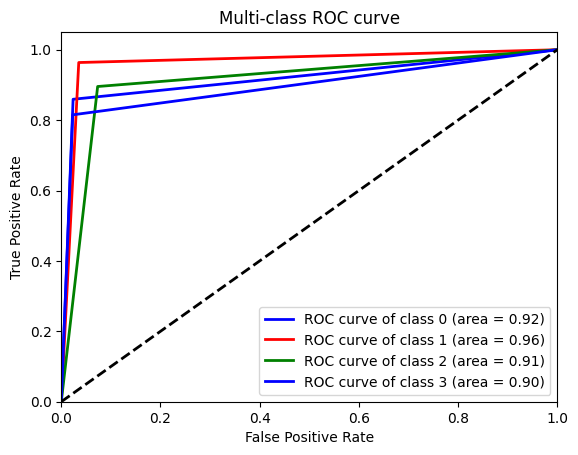

In [74]:
# Binarize the output labels for multi-class ROC curve
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predictions_bin = label_binarize(predictions, classes=np.unique(true_labels))

# Compute ROC curve and ROC area for each class
n_classes = true_labels_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()


In [78]:
# Save the model
torch.save(model.state_dict(), 'transformer_classifier2.pth')